EJERCICIOS VARIOS PARA PRACTICAR EN EL EXAMEN

In [26]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector, Operator
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from numpy import pi, random, matmul, dot, real, sqrt, array

CIRCUITO para el 1er estado de Bell: |Φ+⟩

Circuito para el 1er estado de Bell, |Φ+⟩


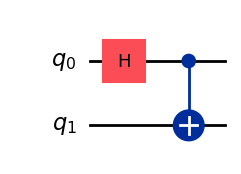

<IPython.core.display.Latex object>

In [27]:
circuit = QuantumCircuit(2)
circuit.h(0)      # Operador Hadamard, con el primer qubit 0
circuit.cx(0, 1)  # Operador CNot, con el qubit 0 de control y el qubit 1 como objetivo

print("Circuito para el 1er estado de Bell, |Φ+⟩"); display(circuit.draw("mpl"))

phiPLUS = Statevector.from_instruction(circuit)
display(phiPLUS.draw("latex"))


CIRCUITOS equivalentes a "NOT" clasico y "^" clasico, con operaciones cuanticas:

Circuito Cuántico para una Puerta 'Not' Clasica, a través de la puerta cuántica 'X':
Entrada => 0 es: {'1': 1024}


<IPython.core.display.Latex object>

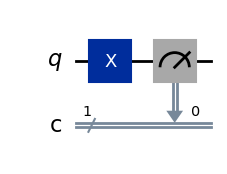

Entrada => 1 es: {'0': 1024}


<IPython.core.display.Latex object>

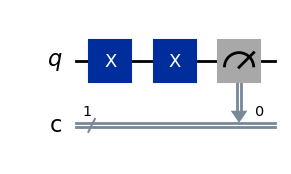

Circuito Cuántico para una Puerta 'AND' Clasica, a través de Toffoli 'CCX':
Se evalua para el caso: (0, 0), con un resultado de {'0': 1024}


<IPython.core.display.Latex object>

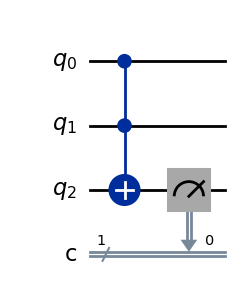

Se evalua para el caso: (0, 1), con un resultado de {'0': 1024}


<IPython.core.display.Latex object>

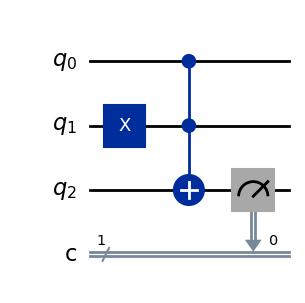

Se evalua para el caso: (1, 0), con un resultado de {'0': 1024}


<IPython.core.display.Latex object>

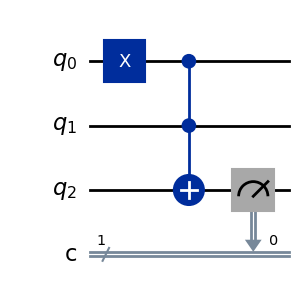

Se evalua para el caso: (1, 1), con un resultado de {'1': 1024}


<IPython.core.display.Latex object>

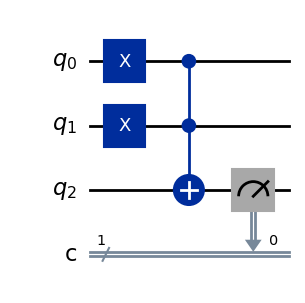

In [28]:
# Circuito Cuántico para una Puerta "Not" Clasica
print("Circuito Cuántico para una Puerta 'Not' Clasica, a través de la puerta cuántica 'X':")
for input_state in [0, 1]:
    gateNotClassical = QuantumCircuit(1, 1)
    if input_state == 0:
        gateNotClassical.x(0)
    else:
        gateNotClassical.x(0)
        gateNotClassical.x(0)
    gNc = Statevector(gateNotClassical)
    gateNotClassical.measure(0, 0)
    job = AerSimulator().run(gateNotClassical, shots=1024)
    result = job.result()
    print(f"Entrada => {input_state} es: {result.get_counts()}")
    display(gNc.draw("latex"))
    display(gateNotClassical.draw(output="mpl"))

# Circuito Cuántico para una Puerta "Y" Clasica ----------------------------------
# Se utiliza esta lista de pares (0,0), (0,1), (1,0), (1,1) para denifir los qubits
# iniciales para el uso solo de la puerta CCX, por recomendación de Qiskit se debe
# utilizar la puerta X de Piolli para invertir los estados 0, definidos por default
# POR TANTO NO SE DEBE TOMAR EN CUENTA LAS PUERTAS "X", PARA EL CIRCUITO, ya que 
# solo es una forma de registrar el estado inicial de cada qubit qubit de control
print("Circuito Cuántico para una Puerta 'AND' Clasica, a través de Toffoli 'CCX':")
for input_state in [(0,0), (0,1), (1,0), (1,1)]:
    gateYClassical = QuantumCircuit(3, 1)
    if input_state[0] == 1:
        gateYClassical.x(0)
    if input_state[1] == 1:
        gateYClassical.x(1)
    gateYClassical.ccx(0, 1, 2)
    gYc = Statevector(gateYClassical)
    gateYClassical.measure(2, 0)
    simulador = AerSimulator()
    job = simulador.run(gateYClassical, shots=1024)
    result = job.result()
    print(f"Se evalua para el caso: {input_state}, con un resultado de {result.get_counts()}")
    display(gYc.draw("latex"))
    display(gateYClassical.draw(output="mpl"))

¿Qué circuito cuántico puede calcular la compuerta NAND?
¿Puedes encontrar una forma de implementar una compuerta NAND utilizando solo una compuerta Toffoli y ninguna otra compuerta cuántica?

Circuito Cuántico para una Puerta 'NAND' Clasica, a través de Toffoli 'CCX':
Se evalua para el caso: (0, 0), con un resultado de {'1': 1024}


<IPython.core.display.Latex object>

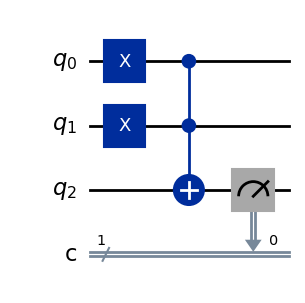

Se evalua para el caso: (0, 1), con un resultado de {'0': 1024}


<IPython.core.display.Latex object>

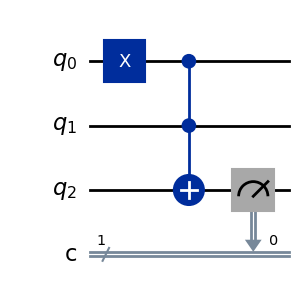

Se evalua para el caso: (1, 0), con un resultado de {'0': 1024}


<IPython.core.display.Latex object>

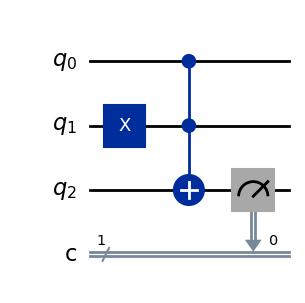

Se evalua para el caso: (1, 1), con un resultado de {'0': 1024}


<IPython.core.display.Latex object>

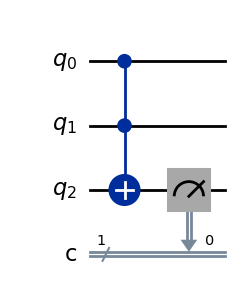

In [29]:
# Se utiliza esta lista de pares (0,0), (0,1), (1,0), (1,1) para denifir los qubits
# iniciales para el uso solo de la puerta CCX, por recomendación de Qiskit se debe
# utilizar la puerta X de Piolli para invertir los estados 0, definidos por default
# POR TANTO NO SE DEBE TOMAR EN CUENTA LAS PUERTAS "X", PARA EL CIRCUITO, ya que 
# solo es una forma de registrar el estado inicial de cada qubit qubit de control
print("Circuito Cuántico para una Puerta 'NAND' Clasica, a través de Toffoli 'CCX':")
for input_state in [(0,0), (0,1), (1,0), (1,1)]:
    gateYClassical = QuantumCircuit(3, 1)
    if input_state[0] == 0:  # Para NAND solo debe registrar el estado inicial a 1
        gateYClassical.x(0)
    if input_state[1] == 0:  # Para NAND solo debe registrar el estado inicial a 1
        gateYClassical.x(1)
    gateYClassical.ccx(0, 1, 2)
    gYc = Statevector(gateYClassical)
    gateYClassical.measure(2, 0)
    simulador = AerSimulator()
    job = simulador.run(gateYClassical, shots=1024)
    result = job.result()
    print(f"Se evalua para el caso: {input_state}, con un resultado de {result.get_counts()}")
    display(gYc.draw("latex"))
    display(gateYClassical.draw(output="mpl"))

Producto TENSORIAL y MATRICIAL, con operadores unitarios

In [30]:
ket = array([[1], [0]])
bra = array([[0, 1]])

# Vista matricial con "Operator"
S = Operator.from_label("S")
T = Operator.from_label("T")
H = Operator.from_label("H")
X = Operator.from_label("X")
plus = Operator.from_label("+")
minus = Operator.from_label("-")
M = Operator([[1, 0, 0, 0],
              [0, 1, 0, 0],
              [0, 0, 0, 1],
              [0, 0, 1, 0]])

# Productos Tensoriales con "Operator"
SXH = Operator.from_label("SXH")

# Vista con notación de DIRAC con "Statevector"
plus_ = Statevector.from_label("+")
minus_ = Statevector.from_label("-")
plus_i = Statevector.from_label("r")
minus_i = Statevector.from_label("l")
zero = Statevector.from_label("0")
one = Statevector.from_label("1")

s000 = Statevector.from_label("000")

# PRODUCTO TENSORIAL
# PTensorial = H.tensor(S).tensor(H).tensor(T)
PTensorial = (H^S^H^T)

# PRODUCTO MATRICIAL
PMatricial = (1/2)*T.dot(H).dot(S).dot(H)

MatmulMatrix = matmul(ket, bra) # Con libreria "numpy"

# Otros ejercicios
mi = M.adjoint()  # metodo Adjunto conjugado, es igual a la inversa de M si es una matriz unitaria

# VISUALIZACIONES:
print("(SXH)"); display(mi.draw("latex"))
# print("(-)"); display(minus_.draw("latex"))
# print("(+i)"); display(plus_i.draw("latex"))
# print("(-i)"); display(minus_i.draw("latex"))
# print("(0)"); display(zero.draw("latex"))
# print("(1)"); display(one.draw("latex"))

print("(S)"); display(S.draw("latex"))

print("Producto Tensorial: 'H^S^H^T"); display(PTensorial.draw("latex"))
print("Producto Matricial: 'H^S^H^T"); display(PMatricial.draw("latex"))
print("Multipliación Matricial: ket * bra"); display(array_to_latex(MatmulMatrix))

(SXH)


<IPython.core.display.Latex object>

(S)


<IPython.core.display.Latex object>

Producto Tensorial: 'H^S^H^T


<IPython.core.display.Latex object>

Producto Matricial: 'H^S^H^T


<IPython.core.display.Latex object>

Multipliación Matricial: ket * bra


<IPython.core.display.Latex object>

Productos Internos (Inner Product)

In [31]:
a = Operator([[1], [5], [1], [3]])
b = Operator.transpose(a)
c = Operator.dot(b, a)

innerProd = real(sqrt(c)[0,0])

# print("Sea el vector: BRA 'a':"); display(a.draw("latex"))
# print("Sea el vector: KET 'a':"); display(b.draw("latex"))
print("Por tanto el Producto Interno de <a|a> es: "); display(c.draw(output="latex"))
print("Con la raíz cuadrada, podemos tener su Norma Euclidiana: ", innerProd)

Por tanto el Producto Interno de <a|a> es: 


<IPython.core.display.Latex object>

Con la raíz cuadrada, podemos tener su Norma Euclidiana:  6.0


NORMA EUCLIDEANA, para el caso debe ser igual a 1

In [32]:
u = Statevector([1/sqrt(2), 1/sqrt(2)])
v = Statevector([(1+2.0j)/3, -2/3])
w = Statevector([1/3, 2/3])

print("Validando si la 'Norma Euclidiana' es igual a 1: ", u.is_valid()); 
display(u.draw("latex"))
print("Validando si la 'Norma Euclidiana' es igual a 1: ", v.is_valid()); 
display(v.draw("latex"))
print("Validando si la 'Norma Euclidiana' es igual a 1: ", w.is_valid()); 
display(w.draw("latex"))

Validando si la 'Norma Euclidiana' es igual a 1:  True


<IPython.core.display.Latex object>

Validando si la 'Norma Euclidiana' es igual a 1:  True


<IPython.core.display.Latex object>

Validando si la 'Norma Euclidiana' es igual a 1:  False


<IPython.core.display.Latex object>